## Towns and graph

In [136]:
import pandas as pd
import geopandas as gpd

towns = gpd.read_file('data/towns.geojson')

In [67]:
import networkx as nx
graph = nx.read_graphml('data/graph.graphml')

In [72]:
graph_crs = graph.graph['crs']
towns = towns.to_crs(graph_crs)
graph.graph['crs'] = towns.crs

In [75]:
from shapely import from_wkt

for _, _, data in graph.edges(data=True):
  # data['weight'] = data['time_min']
  # data['transport_type'] = 'drive'
  data['geometry'] = from_wkt(data['geometry'])

In [76]:
import osmnx as ox
g_nodes, g_edges = ox.graph_to_gdfs(graph) 

In [104]:
rayons = gpd.read_file('data/rayons.geojson').to_crs(towns.crs)

In [109]:
gdfs = []
for i in rayons.index:
  name = rayons.loc[i, 'name']
  gdfs.append(gpd.read_file(f'data/division/{name}.geojson').to_crs(towns.crs))

In [121]:
MOs = pd.concat(gdfs)
MOs['population'] = MOs['2023'].apply(int)

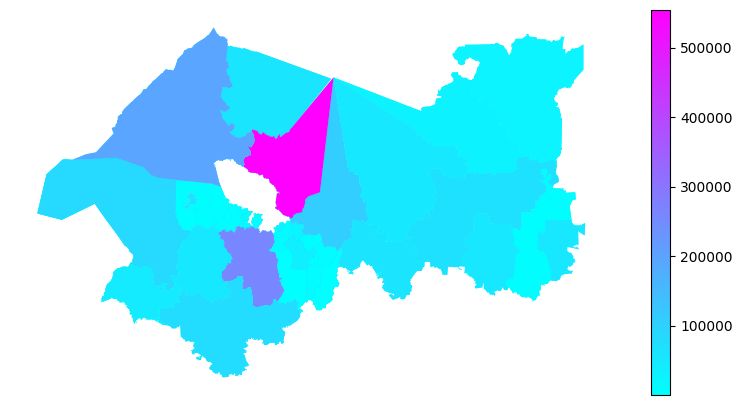

In [125]:
MOs.plot(column='population', cmap='cool', legend=True, figsize=(10,5)).set_axis_off()

In [126]:
water = gpd.read_file('data/water.geojson').to_crs(towns.crs)

- **Образование**: детсады, школы, вузы
- **Культура**: музеи, театры, библиотеки
- **Спорт**: спортивные центры, спортивные залы, спортивные комплексы
- **Туризм**: ОКН, гостиничный бизнес
- **Здравоохранение**: поликлиники, больницы